In [1]:
import os,csv,re,sys
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score
sys.path.insert(0, "/share/appspace_data/shared_groups/BGI/USERS/lichuanxiu/KDD/MMSRL-main")
from MMSRL.utils import *
from MMSRL.process import *
from MMSRL import train_model
import argparse

Loading MMSRL package...


In [2]:
section_id="151509"
k=7

In [3]:
adata = sc.read_h5ad(os.path.join('/share/appspace_data/shared_groups/BGI/USERS/lichuanxiu/KDD/MMSRL-main/Data/DLPFC/',
                                  section_id, "DLPFC_" + section_id + '.h5ad'))

In [4]:
adata.var_names_make_unique()
prefilter_genes(adata, min_cells=3)  # avoiding all genes are zeros
# prefilter_specialgenes(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
adata =  adata[:, adata.var['highly_variable']]

In [5]:

lables_df = pd.read_csv(os.path.join('/share/appspace_data/shared_groups/BGI/USERS/lichuanxiu/KDD/MMSRL-main/Data/DLPFC/',
                                  section_id, "cluster_labels_" + section_id + '.csv'), sep=',', header=0, index_col=0)
adata.obs['ground_truth'] = lables_df.loc[adata.obs_names, 'ground_truth']
lables_df = lables_df.replace(1, "Layer 1")
lables_df = lables_df.replace(2, "Layer 2")
lables_df = lables_df.replace(3, "Layer 3")
lables_df = lables_df.replace(4, "Layer 4")
lables_df = lables_df.replace(5, "Layer 5")
lables_df = lables_df.replace(6, "Layer 6")
lables_df = lables_df.replace(7, "WM")
adata.obs['Ground Truth'] = lables_df.loc[adata.obs_names, 'ground_truth']


In [6]:
adata.obsm["adj"] = calculate_adj_matrix(adata)
adata= train_model.train(adata,k,h=[3000,3000],n_epochs=200,enhancement=True)

[2025-12-28 23:26:20] Epoch: 0/200, Loss: 12.9997
[2025-12-28 23:26:27] Epoch: 5/200, Loss: 10.9351
[2025-12-28 23:26:34] Epoch: 10/200, Loss: 9.3328
[2025-12-28 23:26:41] Epoch: 15/200, Loss: 6.6657
[2025-12-28 23:26:48] Epoch: 20/200, Loss: 5.9265
[2025-12-28 23:26:56] Epoch: 25/200, Loss: 5.6036
[2025-12-28 23:27:03] Epoch: 30/200, Loss: 5.4702
[2025-12-28 23:27:10] Epoch: 35/200, Loss: 5.3809
[2025-12-28 23:27:17] Epoch: 40/200, Loss: 5.3235
[2025-12-28 23:27:23] Epoch: 45/200, Loss: 5.2801
[2025-12-28 23:27:30] Epoch: 50/200, Loss: 5.2479
[2025-12-28 23:27:37] Epoch: 55/200, Loss: 5.2226
[2025-12-28 23:27:44] Epoch: 60/200, Loss: 5.2014
[2025-12-28 23:27:51] Epoch: 65/200, Loss: 5.1772
[2025-12-28 23:27:58] Epoch: 70/200, Loss: 5.1571
[2025-12-28 23:28:05] Epoch: 75/200, Loss: 5.1331
[2025-12-28 23:28:12] Epoch: 80/200, Loss: 5.1054
[2025-12-28 23:28:19] Epoch: 85/200, Loss: 5.0712
[2025-12-28 23:28:25] Epoch: 90/200, Loss: 5.0504
[2025-12-28 23:28:32] Epoch: 95/200, Loss: 5.0306


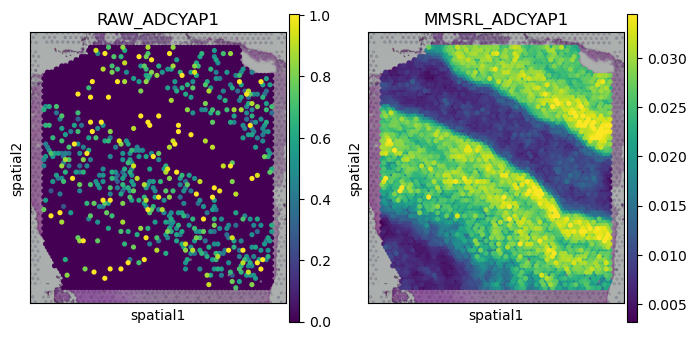

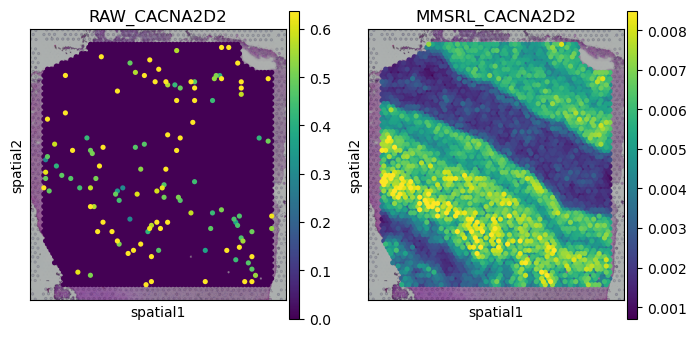

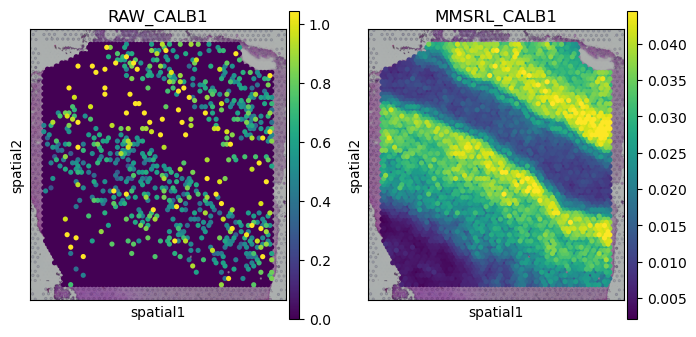

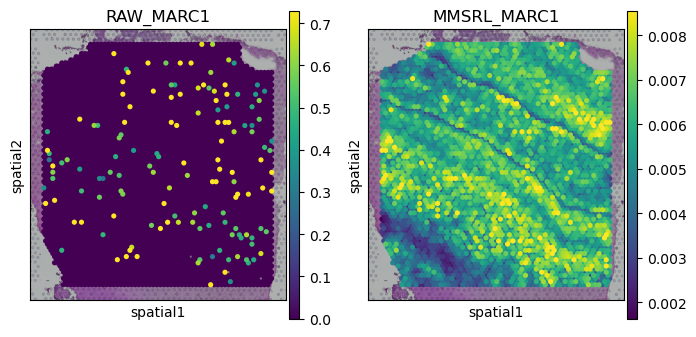

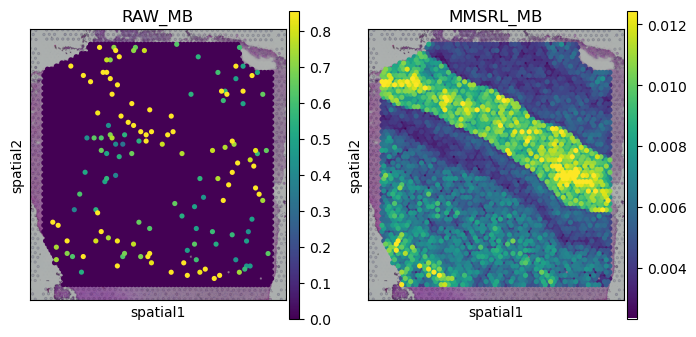

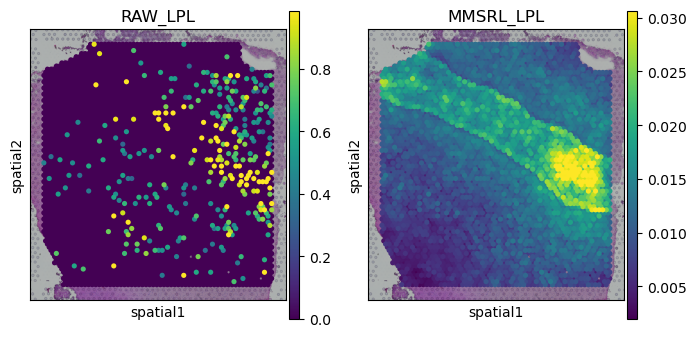

In [7]:
genelist=["ADCYAP1","CACNA2D2","CALB1","MARC1","MB","LPL"]
for plot_gene in genelist:
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    sc.pl.spatial(adata,spot_size=200, img_key="hires", color=plot_gene, show=False, ax=axs[0], title='RAW_'+plot_gene, vmax='p99')
    sc.pl.spatial(adata,spot_size=200, img_key="hires", color=plot_gene, show=True, ax=axs[1], title='MMSRL_'+plot_gene, layer='MMSRL', vmax='p99',save=section_id+plot_gene)